### Baklazhenko Danila J4132. Practice work №3 - Algorithms of non-linear optimization. First-order methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
import numdifftools as num
from scipy import optimize

#### Data initialization

In [2]:
random.seed(10)
alpha = random.random()
beta = random.random()
print(alpha)
print(beta)

rang = range(0, 100)
x_data = [None] * len(rang)
y_data = [None] * len(rang)


for k in rang:
    x_data[k] = k/100
    sig = random.normalvariate(0, 1)
    y_data[k] = alpha * x_data[k] + beta + sig
    
x_data = np.array(x_data)
y_data = np.array(y_data)

0.5714025946899135
0.4288890546751146


In [3]:
# Functions for 
def func_lin(w, x, y):
    a = w[0]
    b = w[1]
    return((a*x + b) - y)

def func_rat(w, x, y):
    a = w[0]
    b = w[1]
    return((a/(1 + b*x)) - y)

def linear_error_func(prms):
    a = prms[0]
    b = prms[1]
    return( sum(( (a*x_data + b) - y_data) ** 2) )

def rational_error_func(prms):
    a = prms[0]
    b = prms[1]
    return( sum(( (a/(1 + b*x_data)) - y_data) ** 2) )

eps = 0.001

#### Methods implementation

In [4]:
# Gradient descent method
def gradient_descent(function, x_start, eps, step = 0.001):
    # Initialize counters
    iterations = 1
    grad_iter = 1
    # Count first gradient step
    gradient = num.Gradient(function)(x_start)
    points_curr = x_start
    points_next = points_curr - step * gradient 
    
    while (abs(points_next[0] - points_curr[0]) > eps) or (abs(points_next[1] - points_curr[1]) > eps):
            # Calculate gradient and next points
            points_curr = points_next 
            gradient = num.Gradient(function)(points_curr)
            points_next = points_curr - step * gradient
            
            # Add interations
            grad_iter += 1 
            iterations += 1    

    a_min = points_next[0]
    b_min = points_next[1]
    return(a_min, b_min, iterations, grad_iter)


#Conjugate gradient descent method
def conj_gradient_descent(function, x_start, eps):
    opts = {'maxiter' : None,    # default value.
            'disp' : True,    # non-default value.
            'gtol' : 1e-5,    # default value.
            'norm' : np.inf  # default value.
           }  
    res = optimize.minimize(function, x_start, method='CG', options=opts)
    return(res)

#Newton`s method - used quasi-newton algorithm BFGS with approximate Hessian
def newton_method(function, x_start, eps):
    opts = {'maxiter' : None,    # default value.
                'disp' : True,    # non-default value.
                'gtol' : 1e-5,    # default value.
                'norm' : np.inf  # default value.
               }  
    res = optimize.minimize(function, x_start, method='BFGS', options=opts)
    return(res)

#Levenberg-Marquardt algorithm with least-squares 
def LMA(function, x_start, eps):
    res = optimize.least_squares(function, x_start, args = (x_data, y_data), method = 'lm')
    return(res)


#### Evaluating methods for linear function

In [5]:
# Initial guess.
x_init = np.asarray((0.5, -0.5))  

# Gradient descent
lin_res_GRAD = gradient_descent(linear_error_func, x_init, eps)
GRAD_approx = [lin_res_GRAD[0] * x + lin_res_GRAD[1] for x in x_data]
print('\n\033[1mResults of Gradient descent method: \033[0m')
print(f'a_min = {lin_res_GRAD[0]}, b_min = {lin_res_GRAD[1]}')
print(f'Iterations = {lin_res_GRAD[2]}, Gradient calculations = {lin_res_GRAD[3]}')
print('---------------------------------------------')

#Conjugate gradient descent 
lin_res_CG = conj_gradient_descent(linear_error_func, x_init, eps)
CG_approx = [lin_res_CG.x[0] * x + lin_res_CG.x[1] for x in x_data]
print('\n\033[1mResults of Conjugate gradient descent  method: \033[0m')
print(lin_res_CG)
print('---------------------------------------------')

#Newton method 
lin_res_NW = newton_method(linear_error_func, x_init, eps)
NW_approx = [lin_res_NW.x[0] * x + lin_res_NW.x[1] for x in x_data]
print('\n\033[1mResults of Newton method (BFGS implementation): \033[0m')
print(lin_res_NW)
print('---------------------------------------------')

#Levenberg-Marquardt algorithm
lin_res_LMA = LMA(func_lin, x_init, eps)
LMA_approx = [lin_res_LMA.x[0] * x + lin_res_LMA.x[1] for x in x_data]
print('\n\033[1mResults of Newton method (BFGS implementation): \033[0m')
print(f'a_min = {lin_res_LMA.x[0]}, b_min = {lin_res_LMA.x[1]}')
#print(lin_res_LMA)
print('---------------------------------------------')


Results of Gradient descent method: 
a_min = 0.5823296455054877, b_min = 0.5240805422556332
Iterations = 133, Gradient calculations = 133
---------------------------------------------
Optimization terminated successfully.
         Current function value: 92.354837
         Iterations: 5
         Function evaluations: 30
         Gradient evaluations: 10

Results of Conjugate gradient descent  method: 
     fun: 92.35483711467161
     jac: array([-7.62939453e-06,  9.53674316e-06])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 10
  status: 0
 success: True
       x: array([0.50831072, 0.56330931])
---------------------------------------------
Optimization terminated successfully.
         Current function value: 92.354837
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6

Results of Newton method (BFGS implementation): 
      fun: 92.35483711466675
 hess_inv: array([[ 0.06000595, -0.02970295],
       [-0.0297

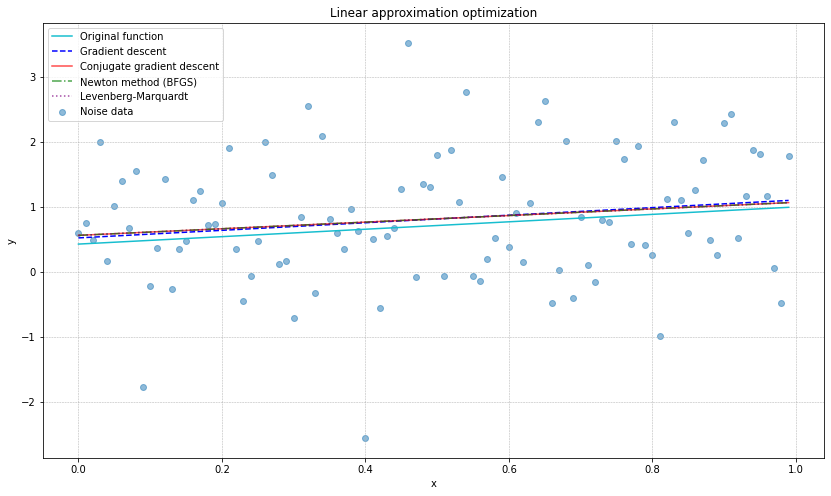

In [6]:
plt.rcParams['figure.figsize'] = [14, 8]
fig, pltx = plt.subplots()
pltx.plot(x_data, [alpha * item + beta for item in x_data], color='tab:cyan', label='Original function')
pltx.plot(x_data, GRAD_approx, color='blue', linestyle = '--', label='Gradient descent')
pltx.plot(x_data, CG_approx, color='red', alpha = 0.7, label='Conjugate gradient descent')
pltx.plot(x_data, NW_approx, color='green', alpha = 0.7, linestyle = '-.', label='Newton method (BFGS)')
pltx.plot(x_data, LMA_approx, color='purple', alpha = 0.7, linestyle = 'dotted', label='Levenberg-Marquardt')
pltx.scatter(x_data, y_data, label='Noise data', alpha = 0.5)
pltx.set(xlabel='x', ylabel='y',title='Linear approximation optimization')
pltx.grid(linestyle = '--', linewidth = 0.5)
pltx.legend(loc = 'best')
plt.show()

#### Evaluating methods for rational function

In [7]:
# Initial guess.
x_init = np.asarray((0.5, -0.5))  
# Gradient descent
lin_res_GRAD = gradient_descent(rational_error_func, x_init, eps)
GRAD_approx = [lin_res_GRAD[0] / ( 1 + lin_res_GRAD[1] * x) for x in x_data]
print('\n\033[1mResults of Gradient descent method: \033[0m')
print(f'a_min = {lin_res_GRAD[0]}, b_min = {lin_res_GRAD[1]}')
print(f'Iterations = {lin_res_GRAD[2]}, Gradient calculations = {lin_res_GRAD[3]}')
print('---------------------------------------------')

#Conjugate gradient descent 
lin_res_CG = conj_gradient_descent(rational_error_func, x_init, eps)
CG_approx = [lin_res_CG.x[0] / ( 1 + lin_res_CG.x[1] * x) for x in x_data]
print('\n\033[1mResults of Conjugate gradient descent  method: \033[0m')
print(lin_res_CG)
print('---------------------------------------------')

#Newton method 
lin_res_NW = newton_method(rational_error_func, x_init, eps)
NW_approx = [lin_res_NW.x[0]/ ( 1 + lin_res_NW.x[1] * x) for x in x_data]
print('\n\033[1mResults of Newton method (BFGS implementation): \033[0m')
print(lin_res_NW)
print('---------------------------------------------')

#Levenberg-Marquardt algorithm
lin_res_LMA = LMA(func_rat, x_init, eps)
LMA_approx = [lin_res_LMA.x[0] /( 1 + lin_res_LMA.x[1] * x) for x in x_data]
print('\n\033[1mResults of Newton method (BFGS implementation): \033[0m')
print(f'a_min = {lin_res_LMA.x[0]}, b_min = {lin_res_LMA.x[1]}')
#print(lin_res_LMA)
print('---------------------------------------------')


Results of Gradient descent method: 
a_min = 0.5852233984829596, b_min = -0.5023517131494927
Iterations = 23, Gradient calculations = 23
---------------------------------------------
Optimization terminated successfully.
         Current function value: 92.244962
         Iterations: 8
         Function evaluations: 54
         Gradient evaluations: 18

Results of Conjugate gradient descent  method: 
     fun: 92.24496199587503
     jac: array([-3.81469727e-06,  9.53674316e-07])
 message: 'Optimization terminated successfully.'
    nfev: 54
     nit: 8
    njev: 18
  status: 0
 success: True
       x: array([ 0.60349547, -0.47327389])
---------------------------------------------
Optimization terminated successfully.
         Current function value: 92.244962
         Iterations: 7
         Function evaluations: 33
         Gradient evaluations: 11

Results of Newton method (BFGS implementation): 
      fun: 92.24496199587503
 hess_inv: array([[0.00986169, 0.01329471],
       [0.01329

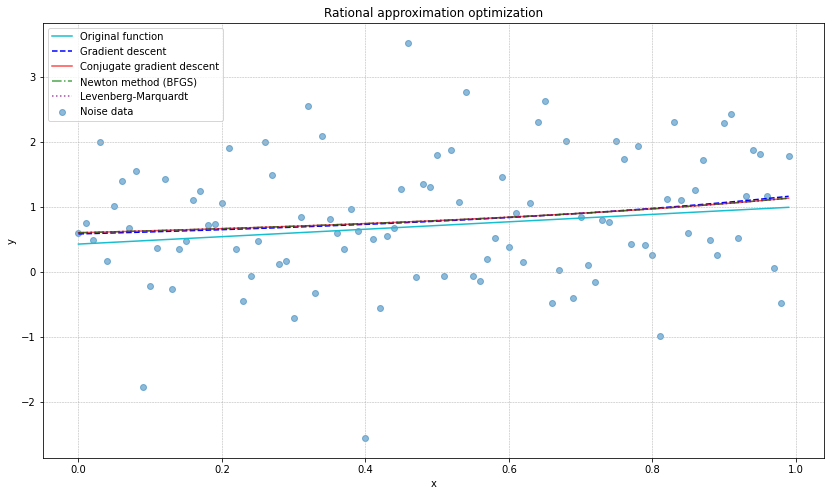

In [8]:
plt.rcParams['figure.figsize'] = [14, 8]
fig, pltx = plt.subplots()
pltx.plot(x_data, [alpha * item + beta for item in x_data], color='tab:cyan', label='Original function')
pltx.plot(x_data, GRAD_approx, color='blue', linestyle = '--', label='Gradient descent')
pltx.plot(x_data, CG_approx, color='red', alpha = 0.7, label='Conjugate gradient descent')
pltx.plot(x_data, NW_approx, color='green', alpha = 0.7, linestyle = '-.', label='Newton method (BFGS)')
pltx.plot(x_data, LMA_approx, color='purple', alpha = 0.7, linestyle = 'dotted', label='Levenberg-Marquardt')
pltx.scatter(x_data, y_data, label='Noise data', alpha = 0.5)
pltx.set(xlabel='x', ylabel='y',title='Rational approximation optimization')
pltx.grid(linestyle = '--', linewidth = 0.5)
pltx.legend(loc = 'best')
plt.show()